In [3]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib


cuisine = []
recipe = []

with open('train.json') as f:
	data = json.load(f)
	for i in data:
		cuisine.append(i['cuisine'])
		recipe.append(i['ingredients'])
     
train = pd.DataFrame({'Cuisine': cuisine, 'Recipe':recipe})

cuisine=  ['thai','vietnamese', 'japanese', 'korean', 'chinese', 
            'british','irish','french','russian',
            'spanish','moroccan','greek','italian','filipino',
            'jamaican','indian',
             'mexican','brazilian',
             'cajun_creole','southern_us']

country = pd.get_dummies(train['Cuisine'])
train = train.join(country)
train

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Cuisine                                             Recipe  \
0             greek  [romaine lettuce, black olives, grape tomatoes...   
1       southern_us  [plain flour, ground pepper, salt, tomatoes, g...   
2          filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3            indian                [water, vegetable oil, wheat, salt]   
4            indian  [black pepper, shallots, cornflour, cayenne pe...   
5          jamaican  [plain flour, sugar, butter, eggs, fresh ginge...   
6           spanish  [olive oil, salt, medium shrimp, pepper, garli...   
7           italian  [sugar, pistachio nuts, white almond bark, flo...   
8           mexican  [olive oil, purple onion, fresh pineapple, por...   
9           italian  [chopped tomatoes, fresh basil, garlic, extra-...   
10          italian  [pimentos, sweet pepper, dried oregano, olive ...   
11          chinese  [low sodium soy sauce, fresh ginger, dry musta...   
12          italian  [Italian parsley leaves, walnuts, hot red pepp...   
13          mexican  [ground cinnamon, fresh cilantro, chili powder...   
14          italian  [fresh parmesan cheese, butter, all-purpose fl...   
15           indian  [tumeric, vegetable stock, tomatoes, garam mas...   
16          british  [greek yogurt, lemon curd, confectioners sugar...   
17          italian  [italian seasoning, broiler-fryer chicken, may...   
18             thai   [sugar, hot chili, asian fish sauce, lime juice]   
19       vietnamese  [soy sauce, vegetable oil, red bell pepper, ch...   
20             thai  [pork loin, roasted peanuts, chopped cilantro ...   
21          mexican  [roma tomatoes, kosher salt, purple onion, jal...   
22      southern_us  [low-fat mayonnaise, pepper, salt, baking pota...   
23          chinese  [sesame seeds, red pepper, yellow peppers, wat...   
24          italian  [marinara sauce, flat leaf parsley, olive oil,...   
25          chinese  [sugar, lo mein noodles, salt, chicken broth, ...   
26     cajun_creole  [herbs, lemon juice, fresh tomatoes, paprika, ...   
27          italian  [ground black pepper, butter, sliced mushrooms...   
28          chinese  [green bell pepper, egg roll wrappers, sweet a...   
29          mexican  [flour tortillas, cheese, breakfast sausages, ...   
...             ...                                                ...   
39744         greek  [extra-virgin olive oil, oregano, potatoes, ga...   
39745       spanish  [quinoa, extra-virgin olive oil, fresh thyme l...   
39746        indian  [clove, bay leaves, ginger, chopped cilantro, ...   
39747      moroccan  [water, sugar, grated lemon zest, butter, pitt...   
39748       italian  [sea salt, pizza doughs, all-purpose flour, co...   
39749       mexican  [kosher salt, minced onion, tortilla chips, su...   
39750       mexican  [ground black pepper, chicken breasts, salsa, ...   
39751      moroccan  [olive oil, cayenne pepper, chopped cilantro f...   
39752   southern_us  [self rising flour, milk, white sugar, butter,...   
39753       italian  [rosemary sprigs, lemon zest, garlic cloves, g...   
39754    vietnamese  [jasmine rice, bay leaves, sticky rice, rotiss...   
39755        indian  [mint leaves, cilantro leaves, ghee, tomatoes,...   
39756       mexican  [vegetable oil, cinnamon sticks, water, all-pu...   
39757         greek  [red bell pepper, garlic cloves, extra-virgin ...   
39758         greek  [milk, salt, ground cayenne pepper, ground lam...   
39759        korean  [red chili peppers, sea salt, onions, water, c...   
39760   southern_us  [butter, large eggs, cornmeal, baking powder, ...   
39761       chinese  [honey, chicken breast halves, cilantro leaves...   
39762        indian  [curry powder, salt, chicken, water, vegetable...   
39763       italian  [fettuccine pasta, low-fat cream cheese, garli...   
39764       mexican  [chili powder, worcestershire sauce, celery, r...   
39765        indian  [coconut, unsweetened coconut milk, mint leave...   
39766         ir

We will also need a list of unique ingredients 

In [4]:
uniqueIng = []

for stuff in recipe:
    uniqueIng+= list(filter(lambda x: x not in uniqueIng, stuff))


We will extract the most commonly used ingredients per cuisine

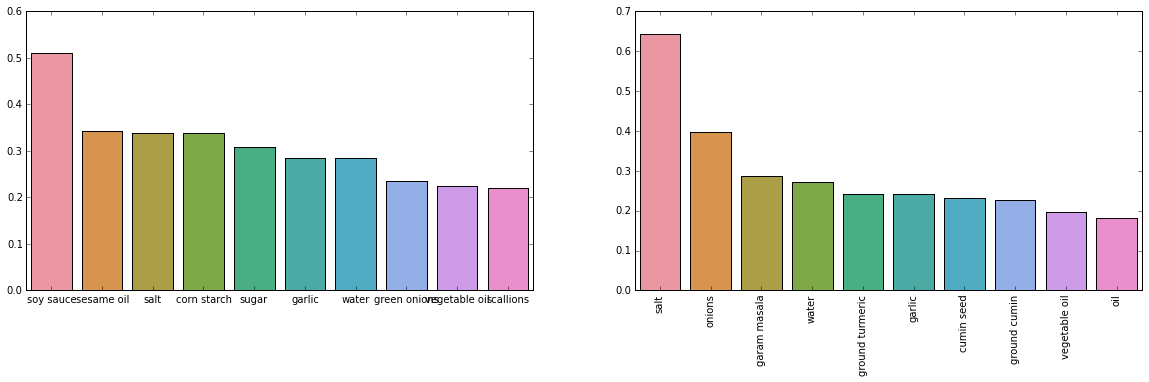

In [17]:
#Returns the top n occurance and probability for each ingredient existing in the type of cuisine
def cuisine_ingredients(cuisine_type, top_num=10):
    dish = train[train['Cuisine']==cuisine_type]['Recipe']
    combined = np.unique(reduce(lambda x,y: x+y, dish), return_counts=True)
    top_count = [x for (y,x) in reversed(sorted(zip(combined[1], combined[0])))]
    
    total_num = train[train['Cuisine']==cuisine_type]['Recipe'].shape[0]
    percentage = list(reversed(sorted(combined[1].astype('float64')/float(total_num))))
    
    return top_count[:top_num], percentage[:top_num]

fig, ax= plt.subplots(1,2,figsize=(20,5))

chinese = cuisine_ingredients('chinese')
indian = cuisine_ingredients('indian')

plt.xticks(rotation=90)
sns.barplot(chinese[0],chinese[1], ax =ax[0] )

sns.barplot(indian[0],indian[1],ax=ax[1])
plt.xticks(rotation=90)
plt.show()

In [18]:
candidates= []
for country in cuisine:
    counIng = cuisine_ingredients(country)
    for i, ing in enumerate(counIng[0]):
        if ing not in candidates and counIng[1][i]>0.2:
            candidates.append(ing)
    
candidates

# matplotlib.rcParams.update({'font.size': 20})

# fig = plt.figure(figsize=(30,30))
# rainbow = cm.rainbow(np.linspace(0,1,len(cuisine)))
# for country, c in zip(cuisine,rainbow):
#     cplot = cuisine_ingredients(country)
#     nameIndex = [uniqueIng.index(stuff) for stuff in cplot[0]]
#     plt.scatter(nameIndex,cplot[1], s= 400,label=country, color= c)
# plt.xlim(0,400)
# plt.legend()
# plt.show()

[u'fish sauce',
 u'garlic',
 u'salt',
 u'coconut milk',
 u'vegetable oil',
 u'soy sauce',
 u'sugar',
 u'water',
 u'carrots',
 u'mirin',
 u'sake',
 u'sesame oil',
 u'green onions',
 u'sesame seeds',
 u'onions',
 u'scallions',
 u'corn starch',
 u'all-purpose flour',
 u'butter',
 u'milk',
 u'unsalted butter',
 u'eggs',
 u'sour cream',
 u'olive oil',
 u'garlic cloves',
 u'extra-virgin olive oil',
 u'ground cumin',
 u'ground cinnamon',
 u'ground ginger',
 u'dried oregano',
 u'feta cheese crumbles',
 u'grated parmesan cheese',
 u'pepper',
 u'oil',
 u'ground allspice',
 u'garam masala',
 u'ground turmeric',
 u'cumin seed',
 u'green bell pepper']

We wish to draw correlations of each ingredients with the available cuisines. But before we move on, there are some preprocessing that we need to do to strengthen our statistics. First we will one-hot these ingredients into the dataframe.

In [20]:
def hasIngre(row, ingre):
    if ingre in row['Recipe']:
        return 1
    else:
        return 0

for i, ingre in enumerate(candidates):
    train[ingre] = train.apply(lambda x: hasIngre(x, ingre), axis=1)
    
train = train.drop(['Cuisine','Recipe'], axis=1)

Second, notice in our dataset, the same ingredient can actually appear to have different names. To rememdy this, we will manually pick out these elements and include that in out candidate list.

In [ ]:
candidates = [ 
    ['fish sauce', 'asian fish sauce', 'Thai fish sauce', 'vietnamnese fish sauce'],
    ['garlic','garlic cloves','minced garlic','large garlic cloves','garlic paste','crushed garlic'],
    'salt',
    'sugar',
    'water',
    ]

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
         36.5,  37.5,  38.5,  39.5,  40.5,  41.5]),
 <a list of 42 Text yticklabel objects>)

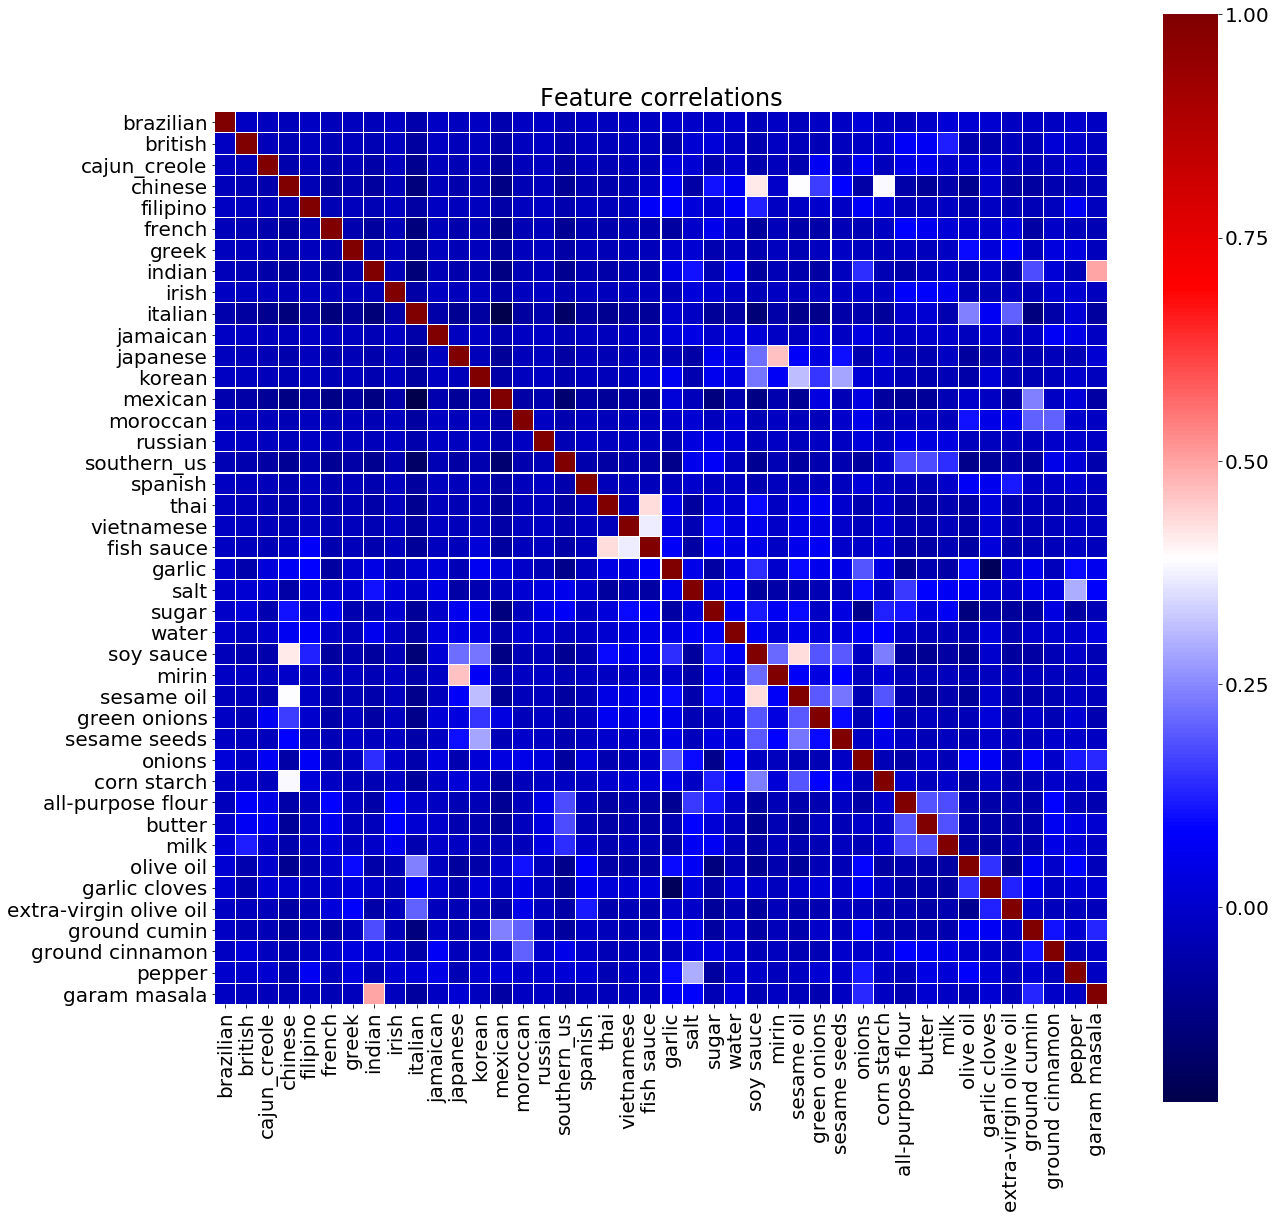

In [30]:
matplotlib.rcParams.update({'font.size': 20})
colormap = plt.cm.seismic
plt.figure(figsize=(20,20))
plt.title('Feature correlations')
sns.heatmap(train.corr(), linewidths = 0.1, vmax=1.0, cmap=colormap, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)